# Ingesta de Datos

## Pipelines de Procesamiento de datos
## Datos numéricos

<p align="center">
<img src="https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-23-at-2.27.20-PM.png" style="width: 600px;"/>
</p>

La **normalización** es una técnica que a menudo se aplica como parte de la preparación de datos para el aprendizaje automático. El objetivo de la **normalización** es cambiar los valores de las columnas numéricas en el conjunto de datos para usar una escala común, sin distorsionar las diferencias en los rangos de valores ni perder información. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente.

Por **ejemplo**, suponga que su conjunto de datos de entrada contiene una columna con valores que van de 0 a 1 y otra columna con valores que van de 10,000 a 100,000. La gran diferencia en la escala de los números podría causar problemas al intentar combinar los valores como características durante el modelado.


La normalización evita estos problemas al crear nuevos valores que mantienen la distribución general y las proporciones en los datos de origen, mientras mantienen los valores dentro de una escala aplicada en todas las columnas numéricas utilizadas en el modelo.

**Tenemos varias opciones para transformar datos numéricos:** 
- Cambiar todos los valores a una escala de 0 a 1 o transformar los valores representándolos como rangos de percentiles en lugar de valores absolutos.
- Aplicar la normalización a una sola columna o a varias columnas en el mismo conjunto de datos.
- Si necesita repetir el experimento o aplicar los mismos pasos de normalización a otros datos, puede guardar los pasos como una transformación de normalización y aplicarlos a otros conjuntos de datos que tengan el mismo esquema.

## Normalizacion Lineal

- **Z-Score**: convierte todos los valores en una puntuación z. Los valores de la columna se transforman mediante la siguiente fórmula: 

<p align="center">
<img src="https://user-images.githubusercontent.com/63415652/122654703-e36b2b00-d112-11eb-847e-5ca8ff3288c5.PNG" style="width: 300px;"/>
</p>
La media y la desviación estándar se calculan para cada columna por separado. Se utiliza la desviación estándar de la población.

- **MinMax**: el normalizador min-max cambia la escala linealmente cada característica al intervalo [0,1]. El cambio de escala al intervalo [0,1] se realiza cambiando los valores de cada característica para que el valor mínimo sea 0, y luego dividiendo por el nuevo valor máximo (que es la diferencia entre los valores máximo y mínimo originales). Los valores de la columna se transforman mediante la siguiente fórmula: 
<p align="center">
<img src="https://miro.medium.com/max/992/1*tbBScNpSloQ9uOd3QYNVtg.png" style="width: 300px;"/>
</p>

La siguiente formula es para hacer un escalamiento de mix max pero en el intervalo de [-1, 1], donde a y b son el rango de valores que queremos dar es decir [a=-1 y b = 1]

<p align="center">
<img src="https://static.platzi.com/media/user_upload/general%20formula-97b6d8eb-b206-4e45-9bb4-d44c948060b7.jpg" style="width: 300px;"/>
</p>

Otros tipos de escalamiento
- Cliping
- Winsorizing
- Log scaling

**Cuando usar la normalizacion lineal?** > En datos simétricos o en datos uniformemente distribuidos

## Normalizacion no lineal

uando la distribución de datos no es simétrica sino sesgada se usa la transformación no lineal.
Esto con el fin de tomar los datos con una distribución no simétrica y se transforman en una distribución que si es simétrica.
Después de eso se aplican los escaladores lineales.

Algunos tipos de transformacion lineal:
- Logística: los valores de la columna se transforman mediante la siguiente fórmula:
<p align="center">
<img src="https://user-images.githubusercontent.com/63415652/122654862-cedb6280-d113-11eb-9d0e-26a1991537d2.PNG" style="width: 300px;"/>
</p>

- Log Normal: esta opción convierte todos los valores a una escala logarítmica normal. Los valores1 de la columna se transforman mediante la siguiente fórmula:
<p align="center">
<img src="https://user-images.githubusercontent.com/63415652/122654861-ce42cc00-d113-11eb-92cc-64fc408fa338.PNG" style="width: 300px;"/>
</p>

Aquí μ y σ son los parámetros de la distribución, calculados empíricamente a partir de los datos como estimaciones de máxima verosimilitud, para cada columna por separado.
- TanH: todos los valores se convierten a una tangente hiperbólica. Los valores de la columna se transforman mediante la siguiente fórmula:

<p align="center">
<img src="https://user-images.githubusercontent.com/63415652/122654864-cf73f900-d113-11eb-9b7d-09ff12d92ca4.PNG"/>
</p>

## Escalamiento de datos numéricos
### Transformaciones Lineales
La idea de hacer pre-procesamiento de datos, es para ayudar al algoritmo con su convergencia en los modelos de ML.
Para eso utilizaremos la libreria **timeit**, verificando el tiempo de ejecucion de los modelos.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit

from sklearn import datasets, linear_model
#aqui extraemos el indice de masa corporal y lo asignamos a X and Y. Por el momento solo usaremos X luego
#en el modelo de entrenamiento usaremos Y
X,y = datasets.load_diabetes(return_X_y=True) 
raw = X[:,None, 2]

Hasta en la celda anterior lo que hemos hecho es importar las librerias que usaremos. Para el ejemplo usaremos un dataset de pacientes con diabetes donde `X` toma el valor de su primera columna (que es el indice de masa corporal) e igualmente `y`. 

Luego ``raw`` toma lo usaremos para hacer una escala en el intervalo $-1 > x >1$. Recordar que antes de hacer un escalamiento tenemos que verificar que nuestros datos no contengan una distribucion tan sesgada. Utilizaremos entonces la formula de escalamiento **MinMax** en el rango de [-1, 1]



(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

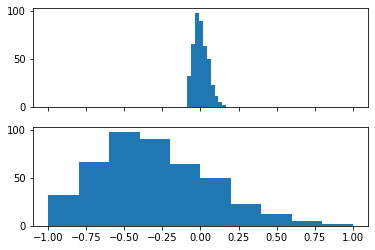

In [2]:
#reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
# x_prima = -1 + (((raw-min_raw)*(2))/(max_raw - min_raw)) esta formula es la misma a la que le sigue
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)
#vamos a imprimir primero el histograma crudo sin realizar su escalamiento (axs[0]) y con su escalamiento (axs[1])
fig, axs = plt.subplots(2,1, sharex=True) #aqui le decimos que compartiremos el mismo eje x.
#tambien le decir que realizamos 2 figuras con una sola columna
axs[0].hist(raw) #histograma sin escalamiento
axs[1].hist(scaled) #histograma con escalamiento

In [3]:
#modelo para entrenamiento, esto lo usaremos solo para medir el tiempo de ejecucion
#entre un modelo crudo `X` y otro con escalamiento `scaled`

def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [4]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
#como vemos el modelo no escalado y demora mas en completar el modelado que la distribucion normalizada.
#quizas no es muy grande la diferencia pero si podemos asumir que el tiempo de demora aumenta con datos mas grande.
print(raw_time, scaled_time)

0.07389249999999947 0.03818240000003925


- max-min scaling: mejor para datos uniformemente dristribuidos
- z-score scaling: mejor para datos distribuidos "normalmente" (forma de campa de gauss)
De igual forma tenemos que comprobar esto para nuestros datos en especifico, es algo relativo.

### Transformaciones No lineales.

En la introducción vimos que los precios de autos de segunda mano estan muy sesgados de forma negativa. Por esa razon utilizaremos ese ejemplo para realizar el escalamiento.

<AxesSubplot:>

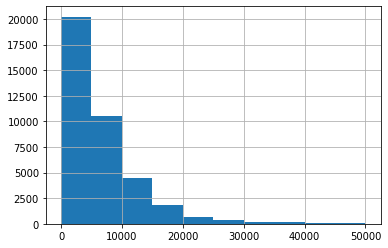

In [5]:
df_price_cars = pd.read_csv('./sources/datasets/cars_.csv')
df_price_cars.price_usd.hist()
#Como vemos la distribucion se encuentra fuertemente sesgada entre 0> x > 10 000

<AxesSubplot:>

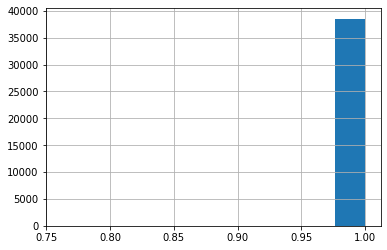

In [6]:
#Realizaremos una transformacion con tangente hiperbolica (tangh(x))

df_price_cars['price_usd'].apply(lambda x: np.tanh(x)).hist()

En este caso la normalizacion tangh apilo todo en un solo valor (aprox 1). Sin embargo nosotros podemos calibrar esa distribucion dividiendolo por un numero. En este caso lo llamaremos `p` y le asignaremos ``10000``

<AxesSubplot:>

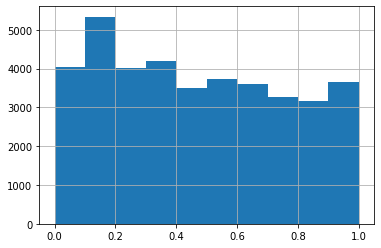

In [7]:
#Realizaremos una transformacion con tangente hiperbolica (tangh(x/p))
p = 10000
df_price_cars['price_usd'].apply(lambda x: np.tanh(x/p)).hist()

Con esta calibracion re-distribuimos los datos de manera que queden mas uniforme.

--------------------------------
A modo de practica escalaremos el datasets `load_diabetes['bmi']` por medio de **z-score.**

In [52]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [59]:
u_diabetes  = df_diabetes['bmi'].mean()
std_diabetes = df_diabetes['bmi'].std()

In [62]:
z_score = (df_diabetes['bmi'] - u_diabetes)/std_diabetes

<AxesSubplot:>

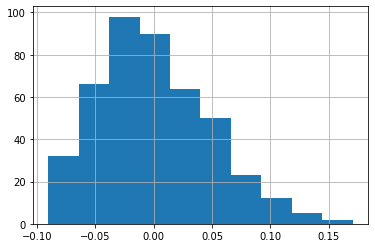

In [72]:
df_diabetes['bmi'].hist()

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89578121, -1.34803712, -0.80029302, -0.25254893,  0.29519517,
         0.84293927,  1.39068336,  1.93842746,  2.48617155,  3.03391565,
         3.58165975]),
 <BarContainer object of 10 artists>)

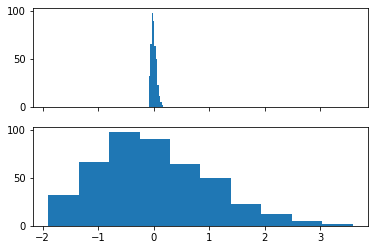

In [78]:

fig, axs = plt.subplots(2,1, sharex=True)

axs[0].hist(df_diabetes['bmi'])
axs[1].hist(z_score)

## Mapeos numéricos

![dummy](https://miro.medium.com/max/1400/1*80tflY8LxDFRmkD16u25RQ.png)

Luego de haber explicado el escalamiento o modelación de las variables numéricas iscretas y continuas. Nos preguntamos entonces... que se hace con aquellas características que son categóricas; características como idioma, sexo, grado academico, nacionalidad son algunos ejemplos que podemos encontrarnos en una problemática. Para procesar este tipo de dato realizamos un **Mapeo Numérico**, el cual consiste en un conjunto de combinaciones binarias que benefician su analisis en un modelo de machine learning. Los dos métodos que existen para interpretar variables categóricas son:

- Dummy: es la representación más compacta que se puede tener de los datos. Es mejor usarla cuando los inputs son variables linealmente independientes (no tienen un grado de correlación significativo). Es decir, las cuando se sabe que las categorías son independientes entre sí.

- One-hot: es más extenso. Permite incluir categorías que no estaban en el dataset inicialmente. De forma que si se filtra una categoría que no estaba incluida, igual se pueda representar numéricamente y no de error en el modelo (este modelo es más cool y es el que se usa).
Hay errores en la notación de Pandas y los tratan como que ambos modelos son lo mismo, pero en la realidad el Dummy no se usa. Aún así, en Pandas el método es .get_dummies().


**Vamos a la práctica**
En nuestro caso utilizaremos la funcion get_dummies de pandas que en realidad es one-hot.

In [85]:
import pandas as pd

In [86]:
df_cars = pd.read_csv('./sources/datasets/cars_.csv')
df_cars.head(2)

manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      True       True      True     False       True      False   
1  ...      True      False     False      True       True      False   

  feature_7  feature_8  feature_9  duration_listed  
0      True       True       True               16  
1     False      False       True               83  

[2 rows x 30 columns]

In [84]:
#Vamos a obtener el one-hot de engine type.
pd.get_dummies(df_cars['engine_type']).sample(4)

diesel  electric  gasoline
17440       0         0         1
14327       0         0         1
34611       1         0         0
36663       0         0         1

In [92]:
#Vamos a utilizar scikitlearn para obtener one hot
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_cars[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [93]:
#Aceite no es un tipo de motor valido por lo tanto scikit learn lo asigna como 0, igual sucede para otras
#categorias que no se encuentren dentro de la columna
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [100]:
#Vamos a tratar una variable numerica discreta como categorica en este caso el año de fabricacion del auto
encoder.fit(df_cars[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

In [102]:
#Vamos a introducir dos valores posibles y otro año erroneo 190
encoder.transform([[2009],[2016],[190]]).toarray()
#Si contamos todos los elementos dentro de las listas podemos ver los años posibles que podemos encontrar
#Y cuando vemos un 1 quiere decir que ha encontrado su categoria, sin embargo el año 190 (última lista)
#esta llena de 0 con lo cual no ha encontrado su categoría o año de fabricación.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Correlaciones

Las correlacion es una medida que intenta determinar el nivel de relacion lineal que existe entre dos características.  

- **Varianza** Medición que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medidas.

- **Coeficiente de correlacion** El coeficiente de correlación es la medida específica que cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación.

Pero... que tienen en común estos conceptos. Ocurre que a través de la formula de varianza podemos calcular el alejamiento de cada dato con respecto a su media; por otra parte, la covarianza calcula el alejamiento de una variable con respecto a otra. Es decir, si la variable `x` aumenta como se comporta la variable `y`.

Otro aspecto a tener en cuenta es que la escala de cada variable normalmente es diferente. Un ejemplo hipotético es que la escala de `x` puede ser de 0 hasta 190 y la escala de `y` puede ser de 300 a 900, entonces es necesario estandarizar las escalas. Por tal razon el resultado de la covarianza se divide entre  "/" el producto de la desviacion estandar de `X` y `Y` 

Vamos a verlo a traves de formulas.

<p align = "center">
<img src = "https://economipedia.com/wp-content/uploads/Varianza-formula.jpg" style="width:400px">
</p>
<p align = "center">
formula de la varianza 
</p>

<p align = "center">
<img src = "https://economipedia.com/wp-content/uploads/2017/10/F%C3%B3rmula-de-la-Covarianza-tama%C3%B1o-extenso.jpg" style="width:400px">
</p>
<p align = "center">
formula de la COvarianza
</p>

<p align = "center">
<img src = "https://i.pinimg.com/736x/64/0d/be/640dbe04c45777296ce29d72f3bc1ca9.jpg" style="width:400px">
</p>
<p align = "center">
Coeficiente de correlación
</p>


El resultado de los coeficiente de correlacion entre dos variables pueden tener distintos patrones.
<p align = "center">
<img src = "https://i.imgur.com/0AKQKBi.png" style="width:700px">
</p>
<p align = "center">
Gráficos de correlaciones
</p>

Aun cuando veamos una correlación fuerte entre dos variables debemos tener en cuenta que 
> Correlación no implica causalidad.

Es importante siempre revisar los datos arrojados y en ocasiones puede que la fuerte correlacion sea meramente coindicencia y no esten estrechamente correlacionadas.

## Matriz de varianza

<p align = "center">
<img src = "https://miro.medium.com/max/1400/1*J6z7xcleH9wxHGGCLvDptg.jpeg" style="width:700px">
</p>
<p align = "center">
Matriz de covarianza
</p>

La matriz varianza–covarianza es una matriz cuadrada de dimensión nxm que recoge las varianzas en la diagonal principal y las covarianzas en los elementos de fuera de la diagonal principal.

En otras palabras, la matriz varianza-covarianza es una matriz que tiene el mismo número de filas y columnas y que tiene distribuidas las varianzas en la diagonal principal y las covarianzas en los elementos fuera de la diagonal principal.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

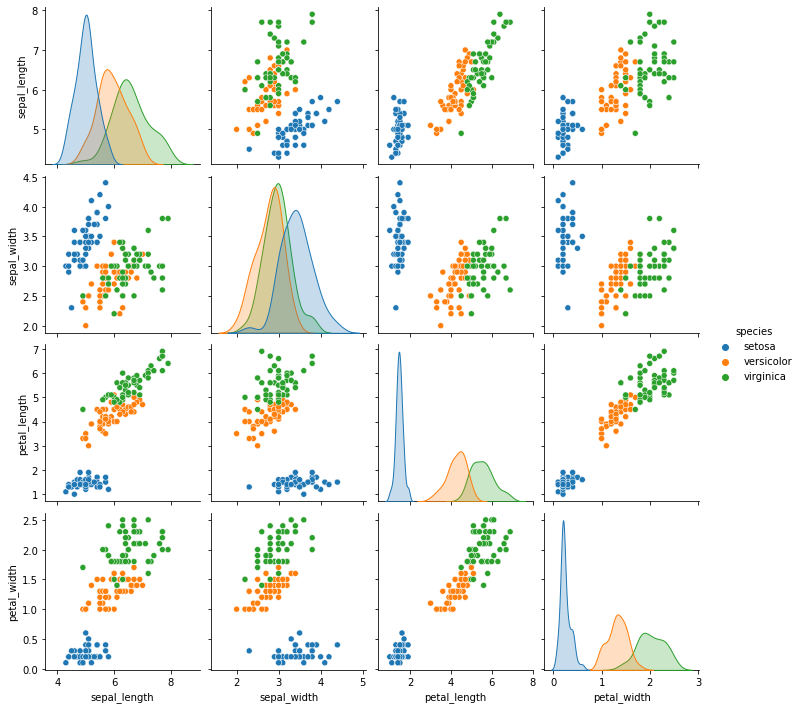

In [106]:
sns.pairplot(iris, hue='species')
#Aqui podemos ver a nivel de grafico el nivel de correlacion.

In [114]:
#Utilizando scikit learn para obtener la matriz de covarianza
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

#Scaled son los datos ya normalizados, y se usa la traspuesta para aplicar la correlacion
scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [116]:
#Obteniendo matriz de covarianza a traves de scikit learn
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [117]:
#matriz de covarianza a traves de pandas
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

<AxesSubplot:>

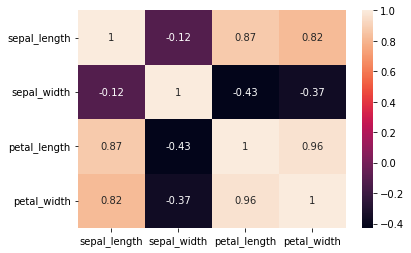

In [118]:
#matriz de covarianza a traves de seaborn
sns.heatmap(iris.corr(), annot=True)